In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve, auc
)

In [17]:
# Load dataset
df = pd.read_csv("train.csv")

In [10]:

# Display first 5 rows to understand structure
print("🔹 First 5 Rows of the Dataset:")
print(df.head())
# Get general info about columns, types, and nulls
print("\n🔹 Dataset Info:")
print(df.info())
# Check for missing values
print("\n🔹 Missing Values in Each Column:")
print(df.isnull().sum())


🔹 First 5 Rows of the Dataset:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt

In [11]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [12]:
# Shape of the dataset
print("🔹 Dataset Shape (rows, columns):", df.shape)

# Statistical summary of numeric columns
print("\n🔹 Statistical Summary:")
print(df.describe())

# Value counts for target variable
print("\n🔹 Distribution of Credit_Score:")
print(df['Credit_Score'].value_counts())


🔹 Dataset Shape (rows, columns): (100000, 28)

🔹 Statistical Summary:
       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000        

In [18]:
# Encode target: 'Good' -> 1, others -> 0
df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 1 if str(x).strip() == 'Good' else 0)

# Drop irrelevant string columns
drop_cols = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Credit_History_Age']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# Convert numerical columns to float
num_cols = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter invalid values
if 'Age' in df.columns:
    df = df[df['Age'] > 0]
df.dropna(inplace=True)

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)



In [ ]:
# Split features and target
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:, 1]

In [21]:
 #Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

In [22]:
# Evaluation function
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n🔍 {name} Model Results:")
    print("Accuracy     :", accuracy_score(y_true, y_pred))
    print("Precision    :", precision_score(y_true, y_pred))
    print("F1 Score     :", f1_score(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
# Evaluate both
evaluate_model("Logistic Regression", y_test, log_pred, log_prob)
evaluate_model("Random Forest", y_test, rf_pred, rf_prob)


🔍 Logistic Regression Model Results:
Accuracy     : 0.6338173205643085
Precision    : 0.27262391996361984
F1 Score     : 0.40275445078938527
ROC-AUC Score: 0.7409723874986405
Confusion Matrix:
 [[4956 3199]
 [ 357 1199]]

🔍 Random Forest Model Results:
Accuracy     : 0.8946555452579549
Precision    : 0.7492984097287184
F1 Score     : 0.6102857142857143
ROC-AUC Score: 0.9307797272952233
Confusion Matrix:
 [[7887  268]
 [ 755  801]]


In [23]:
# Predictions and Probabilities
log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:, 1]

rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]


In [24]:

import joblib
# Save Random Forest model to a file
joblib.dump(rf_model, "random_forest_credit_model.pkl")
print("✅ Random Forest model saved as 'random_forest_credit_model.pkl'")
# Save Logistic Regression model to a file
joblib.dump(log_model, "logistic_regression_credit_model.pkl")
print("✅ Logistic Regression model saved as 'logistic_regression_credit_model.pkl'")
# Load model
model = joblib.load("random_forest_credit_model.pkl")



✅ Random Forest model saved as 'random_forest_credit_model.pkl'
✅ Logistic Regression model saved as 'logistic_regression_credit_model.pkl'


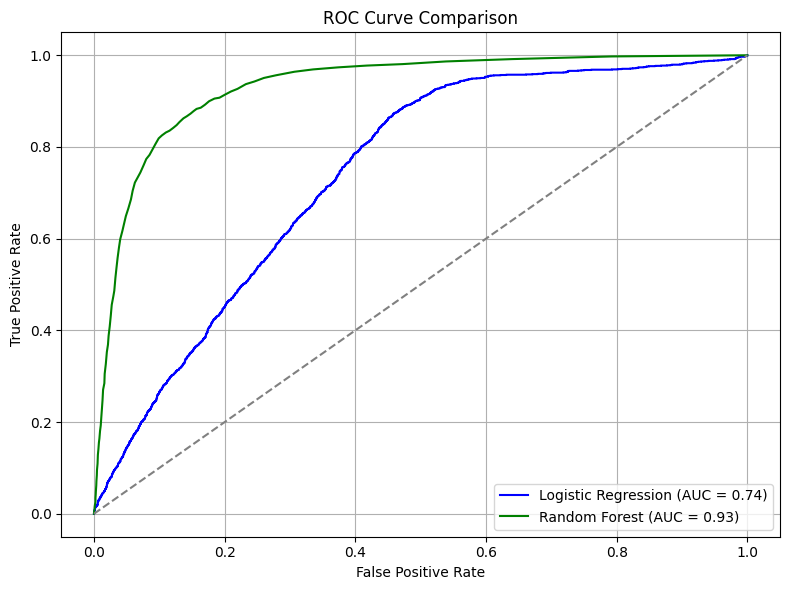

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})", color="blue")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="green")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

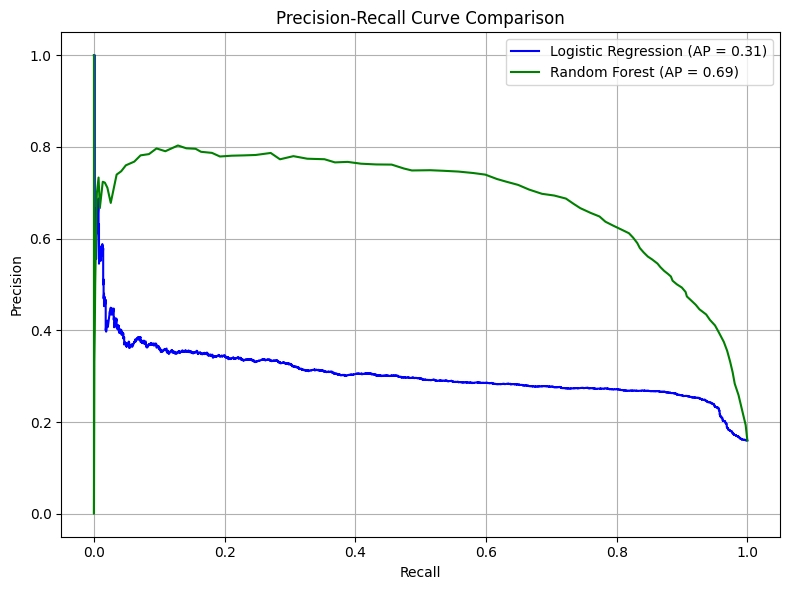

In [26]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Get precision and recall values
precision_log, recall_log, _ = precision_recall_curve(y_test, log_prob)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_prob)
# Average precision scores
avg_prec_log = average_precision_score(y_test, log_prob)
avg_prec_rf = average_precision_score(y_test, rf_prob)
# Plotting PR curves
plt.figure(figsize=(8, 6))
plt.plot(recall_log, precision_log, label=f"Logistic Regression (AP = {avg_prec_log:.2f})", color='blue')
plt.plot(recall_rf, precision_rf, label=f"Random Forest (AP = {avg_prec_rf:.2f})", color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

In [28]:
import gradio as gr
import joblib
import pandas as pd

# Load trained model
model = joblib.load("C:\Users\Shashwat Srivastava\Desktop\Credit_Score\logistic_regression_credit_model.pkl")

# Define input fields — match your dataset features
def predict_credit_score(
    Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment,
    Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance
):
    # Create input DataFrame
    input_data = pd.DataFrame([[
        Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment,
        Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance
    ]], columns=[
        'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
        'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'
    ])
    
    # Make prediction
    pred = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]
    
    result = "Good Credit Score" if pred == 1 else "Not Good Credit Score"
    return f"{result} (Confidence: {prob:.2%})"

# Gradio interface
iface = gr.Interface(
    fn=predict_credit_score,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Annual Income"),
        gr.Number(label="Number of Loans"),
        gr.Number(label="Number of Delayed Payments"),
        gr.Number(label="Changed Credit Limit"),
        gr.Number(label="Outstanding Debt"),
        gr.Number(label="Amount Invested Monthly"),
        gr.Number(label="Monthly Balance")
    ],
    outputs="text",
    title="Credit Score Prediction",
    description="Predict whether someone has a good credit score based on financial details."
)

iface.launch()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3638934680.py, line 6)